In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Ornstein–Uhlenbeck Process
The Ornstein–Uhlenbeck process is described by the stochastic differential equation:

$$
dX_t = \theta(\mu - X_t)dt + \sigma dW_t
$$

where $X_t$ is the process at time $t$, $\mu$ is the mean, $\theta$ is the rate of mean reversion, $\sigma$ is the volatiliy, $W_t$ is a standard Brownian motion, and $X_0=x_0$ is the initial value. The process $X_t$ is normally distributed with

$$
\mathbb{E}[X_t] = \mu + (x_0 - \mu)e^{-\theta t}
$$

and

$$
\mathrm{Var}(X_t) = \frac{\sigma^2}{2\theta}(1 - e^{-2\theta t})
$$


In [2]:
def simulate_ou_process(theta, mu, sigma, dt, num_steps, initial_value):
    np.random.seed(4380) # making sure we are using same set of random numbers for different parameters
    values = np.zeros(num_steps)
    values[0] = initial_value
    
    for i in range(1, num_steps):
        drift = theta * (mu - values[i - 1]) * dt
        diffusion = sigma * np.sqrt(dt) * np.random.normal()
        
        values[i] = values[i - 1] + drift + diffusion
    
    return values

In [3]:
# parameters to be used
theta = 1
mu = 1
sigma = 0.5
dt = 0.01
num_steps = 1000
initial_value = 0

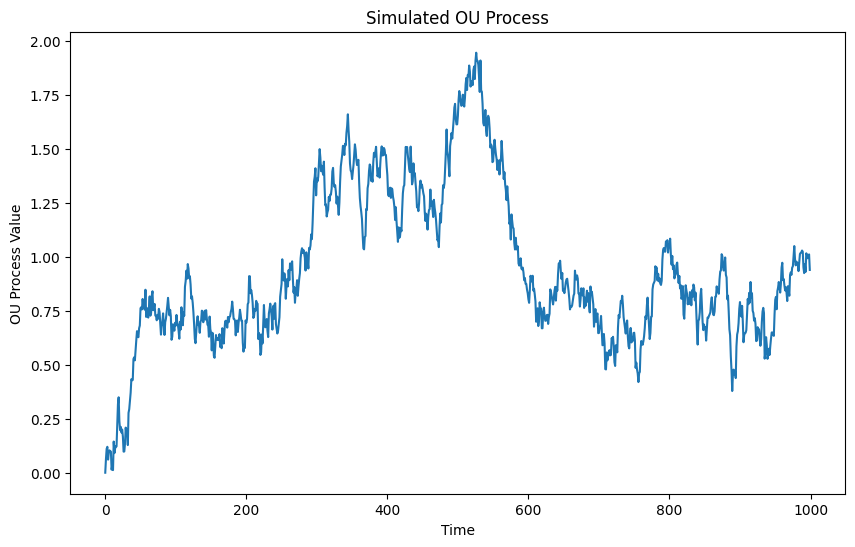

In [4]:
values = simulate_ou_process(theta, mu, sigma, dt, num_steps, initial_value)
plt.figure(figsize=(10, 6))
plt.plot(values)
plt.xlabel('Time')
plt.ylabel('OU Process Value')
plt.title('Simulated OU Process')
plt.show()

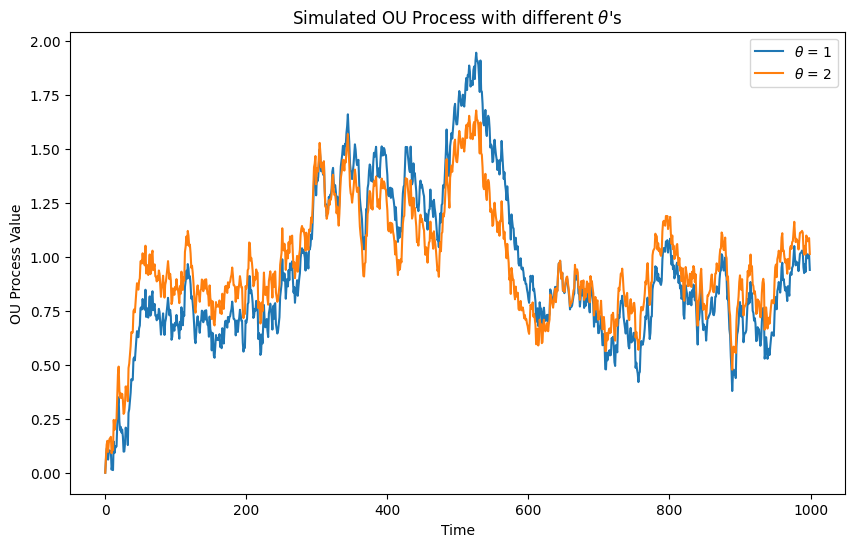

In [5]:
multiplier = 2
values_theta = simulate_ou_process(multiplier * theta, mu, sigma, dt, num_steps, initial_value)
plt.figure(figsize=(10, 6))
plt.plot(values, label=r'$\theta$ = {}'.format(theta))
plt.plot(values_theta, label=r'$\theta$ = {}'.format(multiplier * theta))
plt.xlabel('Time')
plt.ylabel('OU Process Value')
plt.title(r"Simulated OU Process with different $\theta$'s")
plt.legend()
plt.show()

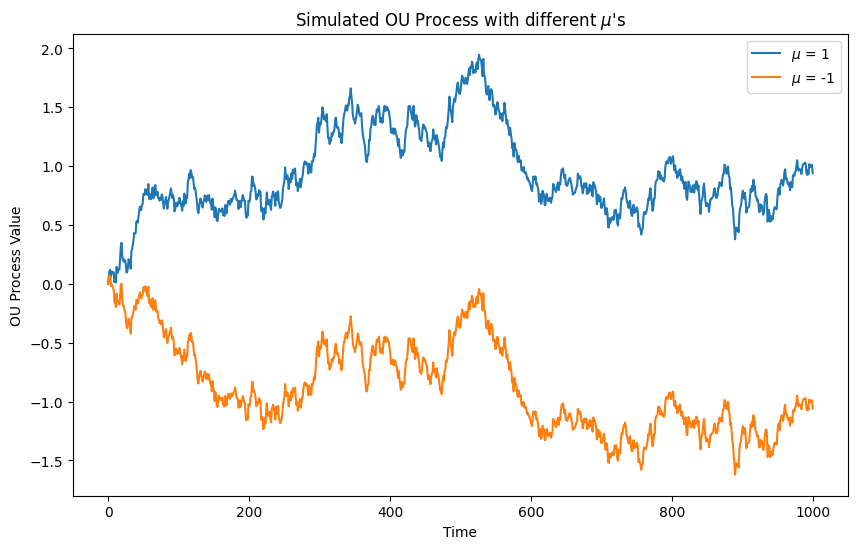

In [6]:
multiplier = -1
values_mu = simulate_ou_process(theta, multiplier * mu, sigma, dt, num_steps, initial_value)
plt.figure(figsize=(10, 6))
plt.plot(values, label=r'$\mu$ = {}'.format(mu))
plt.plot(values_mu, label=r'$\mu$ = {}'.format(multiplier * mu))
plt.xlabel('Time')
plt.ylabel('OU Process Value')
plt.title(r"Simulated OU Process with different $\mu$'s")
plt.legend()
plt.show()

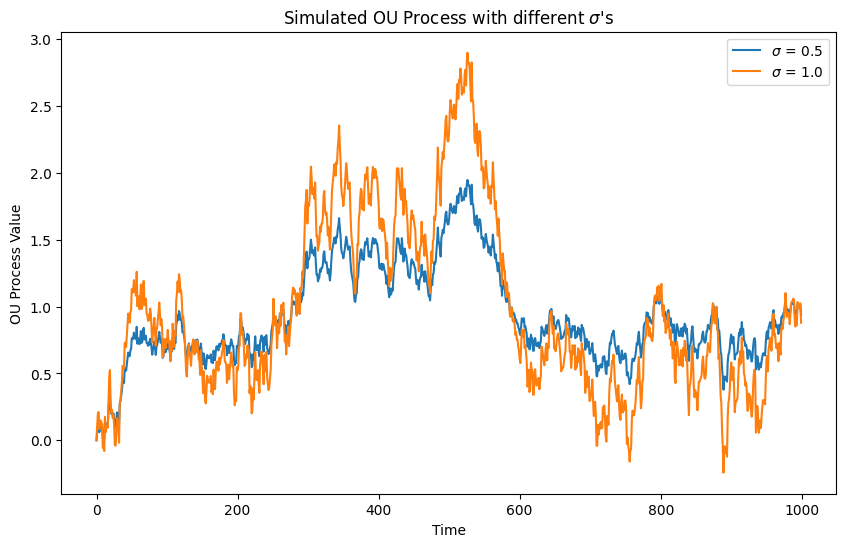

In [7]:
multiplier = 2
values_sigma = simulate_ou_process(theta, mu, multiplier * sigma, dt, num_steps, initial_value)
plt.figure(figsize=(10, 6))
plt.plot(values, label=r'$\sigma$ = {}'.format(sigma))
plt.plot(values_sigma, label=r'$\sigma$ = {}'.format(multiplier * sigma))
plt.xlabel('Time')
plt.ylabel('OU Process Value')
plt.title(r"Simulated OU Process with different $\sigma$'s")
plt.legend()
plt.show()